In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [38]:
df=pd.read_csv('HealthApp_2k.log_structured.csv')

In [39]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f', errors='coerce')


In [40]:
df['DayOfWeek'] = df['Time'].dt.day_name()
df['HourOfDay'] = df['Time'].dt.hour


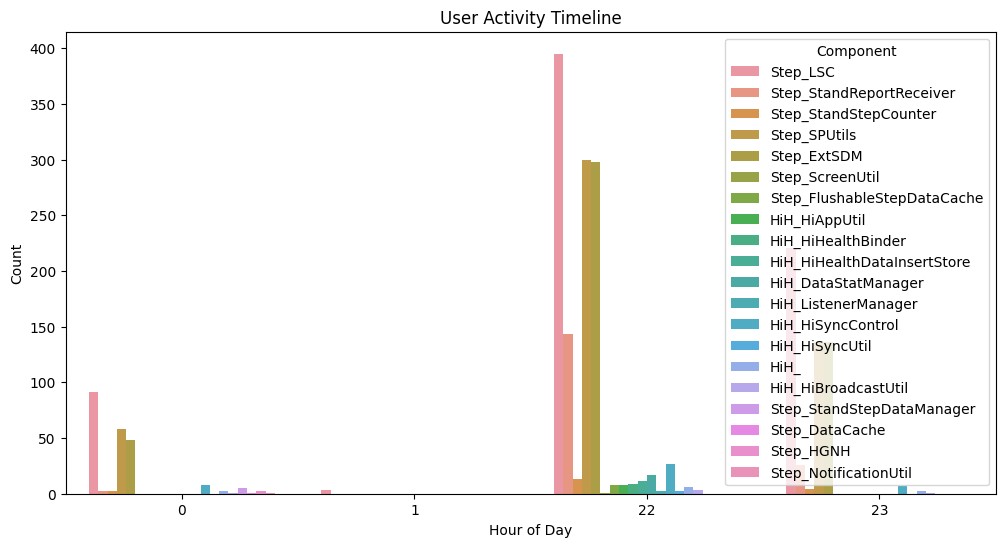

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=df, hue='Component')
plt.title('User Activity Timeline')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Component')
plt.show()


In [42]:
daily_steps = df[df['Component'] == 'Step_LSC'].groupby(df['Time'].dt.date)['Content'].apply(lambda x: x.str.extract('(\d+)').astype(float).sum())


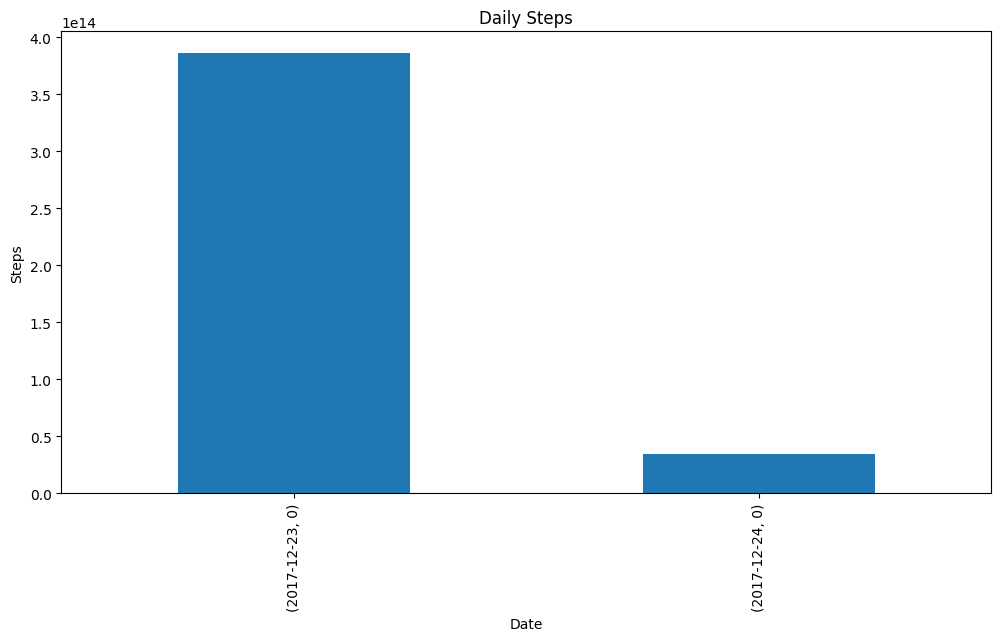

In [43]:
plt.figure(figsize=(12, 6))
daily_steps.plot(kind='bar')
plt.title('Daily Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()




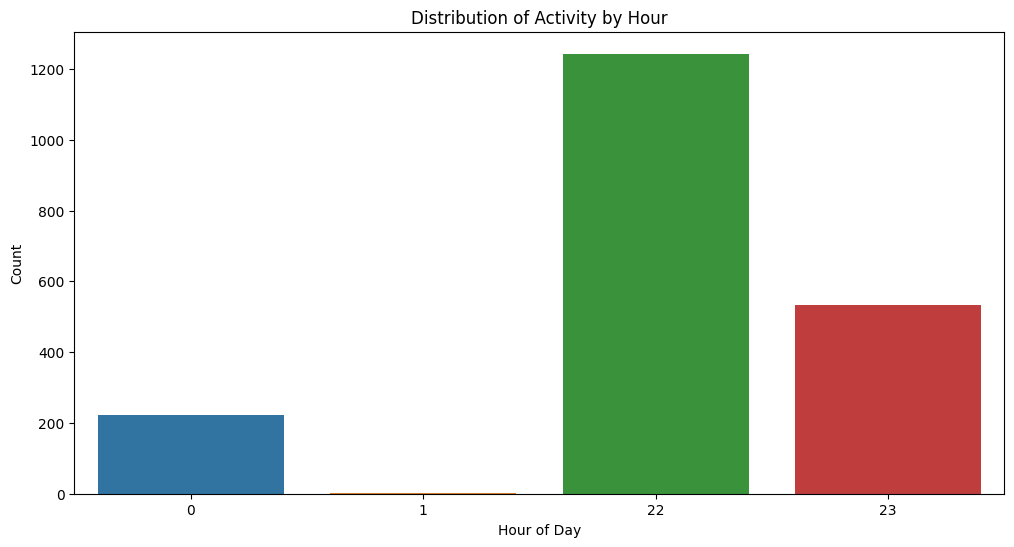

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=df)
plt.title('Distribution of Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


In [53]:
calories_data = df[df['Component'] == 'Step_ExtSDM']['Content'].str.extract('totalCalories=(\d+)').astype(float)
time_data = df[df['Component'] == 'Step_ExtSDM']['Time']

             0
8     126775.0
9          NaN
17    126797.0
18         NaN
24    126818.0
...        ...
1954       NaN
1959       0.0
1960       NaN
1968       0.0
1969       NaN

[482 rows x 1 columns]
8      2017-12-23 22:15:29.645
9      2017-12-23 22:15:29.648
17     2017-12-23 22:15:29.959
18     2017-12-23 22:15:29.962
24     2017-12-23 22:15:30.639
                 ...          
1954   2017-12-24 00:25:16.445
1959   2017-12-24 00:25:17.445
1960   2017-12-24 00:25:17.445
1968   2017-12-24 00:28:25.461
1969   2017-12-24 00:28:25.461
Name: Time, Length: 482, dtype: datetime64[ns]


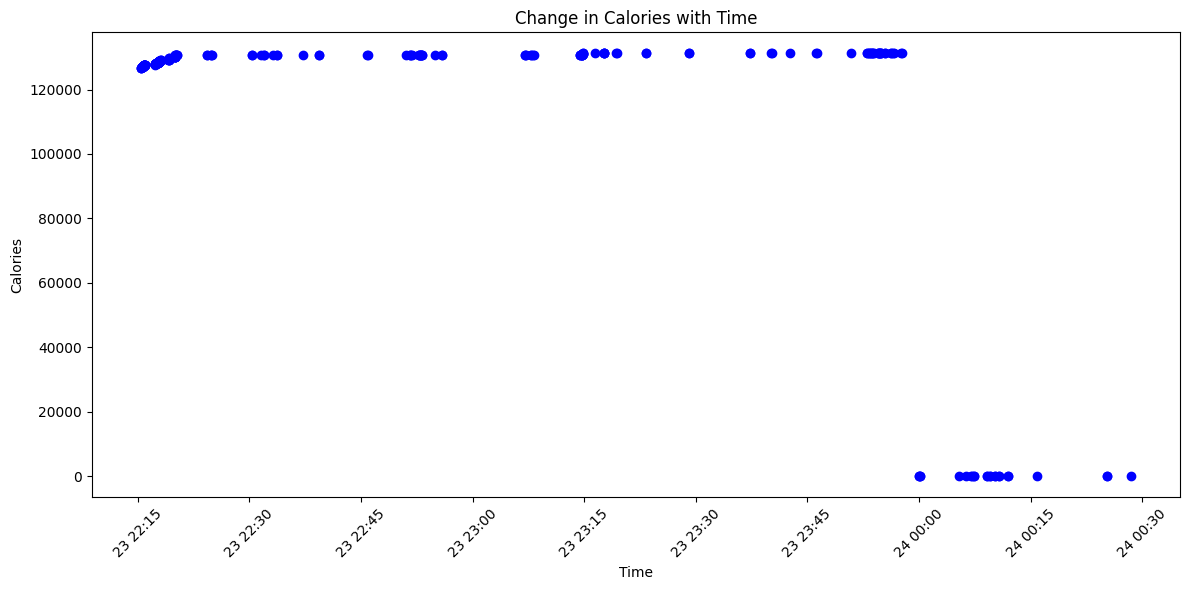

In [56]:
print(calories_data)
print(time_data)

time_data = pd.to_datetime(time_data)

plt.figure(figsize=(12, 6))
plt.plot(time_data, calories_data, marker='o', linestyle='-', color='b')

plt.title('Change in Calories with Time')
plt.xlabel('Time')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
df['Goal'] = df[df['Component'].isin(['Step_SPUtils'])]['Content'].str.extract(r'getTodayTotalDetailSteps = (\d+)').astype(float)

df['Achieved'] = df[df['Component'].isin(['Step_SPUtils'])]['Content'].str.extract(r'setTodayTotalDetailSteps=(\d+)').astype(float)


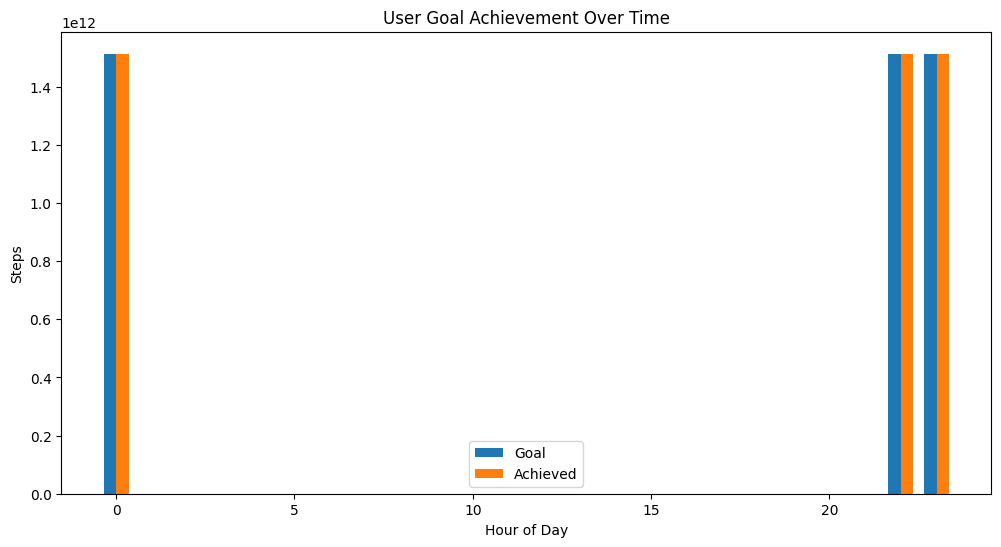

In [65]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = df[df['Component'] == 'Step_SPUtils']['HourOfDay']
plt.bar(bar_positions - bar_width/2, df[df['Component'] == 'Step_SPUtils']['Goal'], bar_width, label='Goal')
plt.bar(bar_positions + bar_width/2, df[df['Component'] == 'Step_SPUtils']['Achieved'], bar_width, label='Achieved')

plt.title('User Goal Achievement Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Steps')
plt.legend()
plt.show()


In [66]:
component_counts = df['Component'].value_counts()


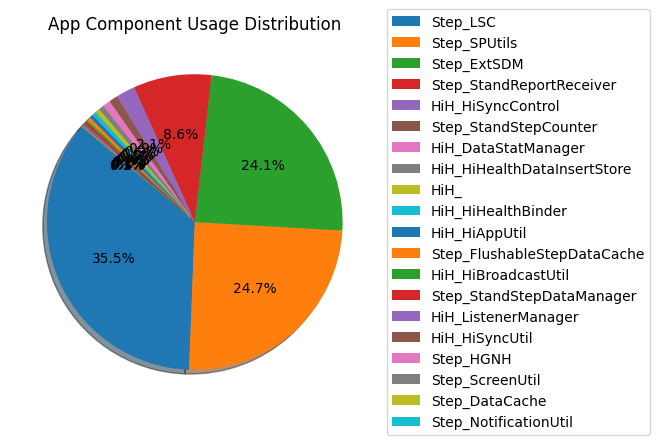

In [70]:
plt.pie(component_counts, labels=None, autopct='%1.1f%%', startangle=140, shadow=True)
plt.gca().set_aspect('equal')

labels = component_counts.index
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('App Component Usage Distribution')
plt.show()
